In [1]:
#Housing Project
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
# we have two files one for TRain and other for test and we can see some mising values are in dataset
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

In [5]:
#data integrity 
df.duplicated().sum()

0

In [7]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

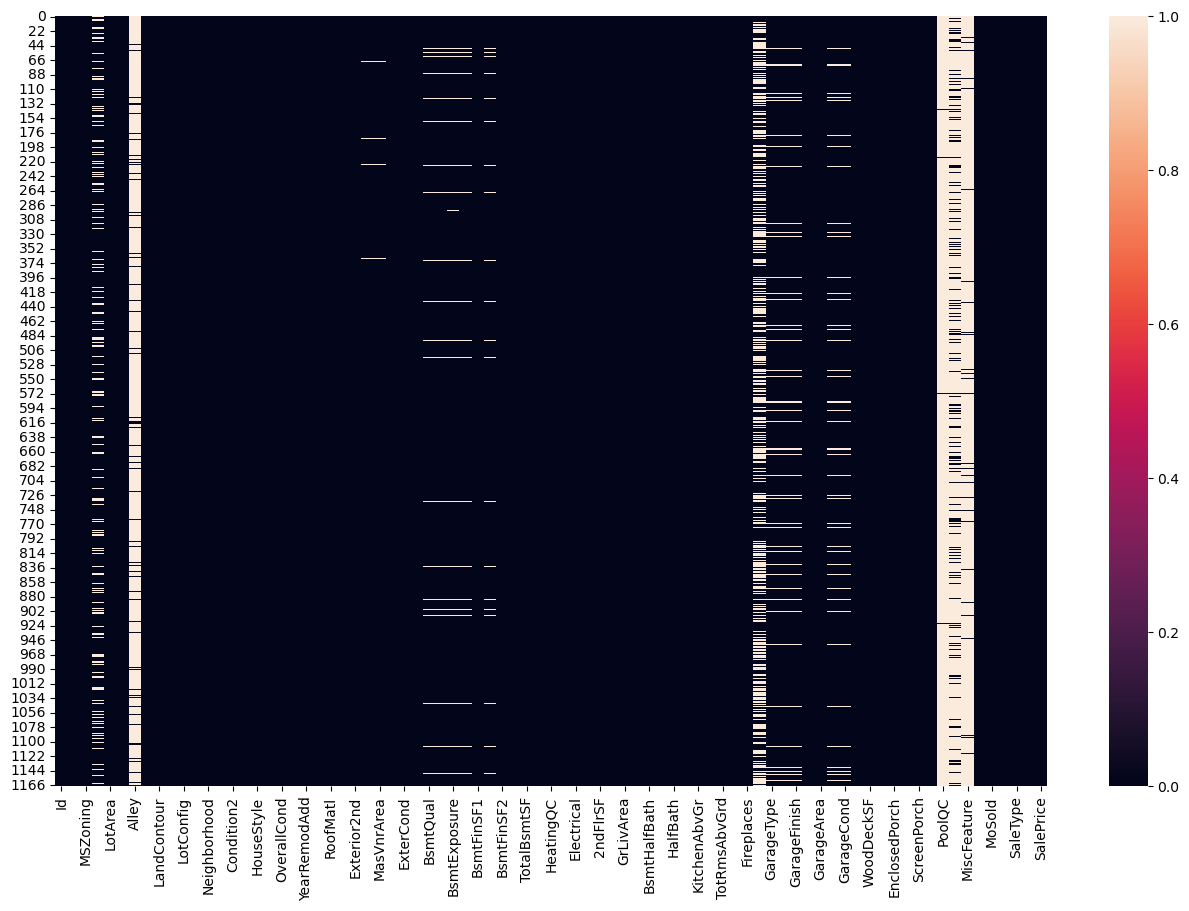

In [8]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [9]:
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                   1161       99.400685
MiscFeature              1124       96.232877
Alley                    1091       93.407534
Fence                     931       79.708904
FireplaceQu               551       47.174658
LotFrontage               214       18.321918
GarageYrBlt                64        5.479452
GarageFinish               64        5.479452
GarageType                 64        5.479452
GarageQual                 64        5.479452
GarageCond                 64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtCond                   30        2.568493
BsmtFinType1               30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
Id                          0        0.000000
Functional                  0        0.000000
Fireplaces                  0     

In [10]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [11]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

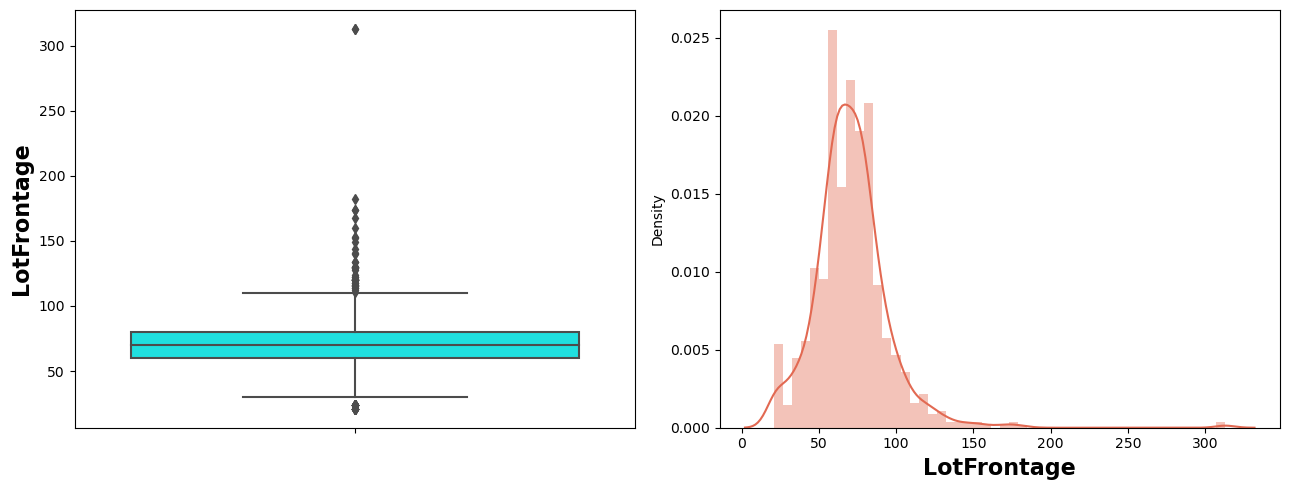

In [12]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.boxplot( y = 'LotFrontage', data= df, color='cyan')
plt.ylabel('LotFrontage', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(df['LotFrontage'])
plt.xlabel('LotFrontage', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [14]:
df['LotFrontage'].isnull().any()

False

In [15]:
df['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [16]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [17]:
df['GarageType'].value_counts()

Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [18]:
df['GarageYrBlt'].mode()[0]

2006.0

In [19]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [20]:
df['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [21]:
df['GarageFinish'].mode()[0]

'Unf'

In [22]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [23]:
df['GarageFinish'].isnull().any()

False

In [24]:
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
GarageQual                 64        5.479452
GarageCond                 64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtFinType1               30        2.568493
BsmtCond                   30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
KitchenQual                 0        0.000000
KitchenAbvGr                0        0.000000
BedroomAbvGr                0        0.000000
Id                          0        0.000000
Functional                  0        0.000000
HalfBath                    0        0.000000
FullBath                    0        0.000000
BsmtHalfBath                0        0.000000
BsmtFullBath                0        0.000000
GrLivArea                   0        0.000000
LowQualFinSF                0        0.000000
TotRmsAbvGrd                0     

In [25]:
df['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

In [26]:
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [27]:
df['GarageQual'].isnull().any()

False

In [28]:
df['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [29]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [30]:
df['GarageCond'].isnull().any()

False

In [31]:
df['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [32]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [33]:
df['BsmtFinType2'].isnull().any()

False

In [34]:
df['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [35]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [36]:
df['BsmtExposure'].isnull().any()

False

In [37]:
df['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [38]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [39]:
df['BsmtFinType1'].isnull().any()

False

In [40]:
df['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [41]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [42]:
df['BsmtCond'].isnull().any()

False

In [43]:
df['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [44]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [45]:
df['BsmtQual'].isnull().any()

False

In [46]:
df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [47]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [48]:
df['MasVnrType'].isnull().any()

False

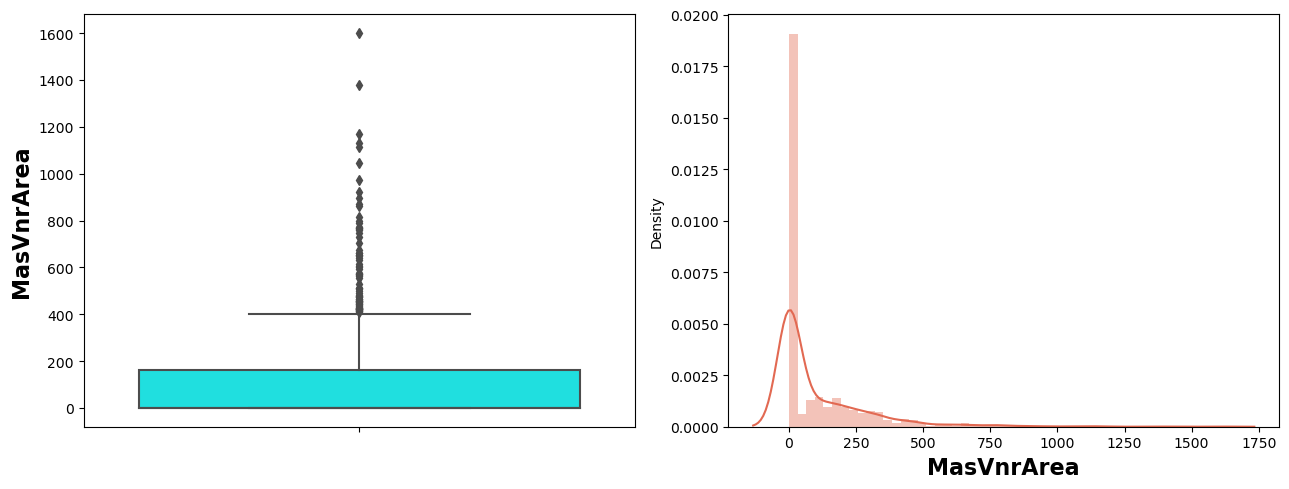

In [49]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.boxplot( y = 'MasVnrArea', data= df, color='cyan')
plt.ylabel('MasVnrArea', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(df['MasVnrArea'])
plt.xlabel('MasVnrArea', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [50]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [51]:
df['MasVnrArea'].isnull().any()

False

In [52]:
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Id                          0             0.0
FullBath                    0             0.0
Fireplaces                  0             0.0
Functional                  0             0.0
TotRmsAbvGrd                0             0.0
KitchenQual                 0             0.0
KitchenAbvGr                0             0.0
BedroomAbvGr                0             0.0
HalfBath                    0             0.0
BsmtHalfBath                0             0.0
MSSubClass                  0             0.0
BsmtFullBath                0             0.0
GrLivArea                   0             0.0
LowQualFinSF                0             0.0
2ndFlrSF                    0             0.0
1stFlrSF                    0             0.0
Electrical                  0             0.0
CentralAir                  0             0.0
GarageType                  0             0.0
GarageYrBlt                 0             0.0
GarageFinish                0     

No Missing value present in Training Dataset.

In [54]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.807363,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.440317,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [55]:
#converting years to age
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_Since'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [56]:
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [57]:
#data checking for test data
dft = pd.read_csv('test.csv')

In [58]:
dft.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [59]:
pd.set_option('display.max_rows',None) 
missing_values = dft.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(dft))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                    292      100.000000
MiscFeature               282       96.575342
Alley                     278       95.205479
Fence                     248       84.931507
FireplaceQu               139       47.602740
LotFrontage                45       15.410959
GarageType                 17        5.821918
GarageYrBlt                17        5.821918
GarageQual                 17        5.821918
GarageCond                 17        5.821918
GarageFinish               17        5.821918
BsmtCond                    7        2.397260
BsmtFinType2                7        2.397260
BsmtFinType1                7        2.397260
BsmtQual                    7        2.397260
BsmtExposure                7        2.397260
MasVnrArea                  1        0.342466
MasVnrType                  1        0.342466
Electrical                  1        0.342466
HalfBath                    0        0.000000
BsmtFullBath                0     

In [60]:
dft.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [61]:
dft['LotFrontage'] = dft['LotFrontage'].fillna(dft['LotFrontage'].median())
dft['GarageType'] = dft['GarageType'].fillna(dft['GarageType'].mode()[0])
dft['GarageYrBlt']= dft['GarageYrBlt'].fillna(dft['GarageYrBlt'].mode()[0])
dft['GarageFinish']= dft['GarageFinish'].fillna(dft['GarageFinish'].mode()[0])
dft['GarageQual'] = dft['GarageQual'].fillna(dft['GarageQual'].mode()[0])
dft['GarageCond'] = dft['GarageCond'].fillna(dft['GarageCond'].mode()[0])
dft['BsmtFinType2'] = dft['BsmtFinType2'].fillna(dft['BsmtFinType2'].mode()[0])
dft['BsmtExposure'] = dft['BsmtExposure'].fillna(dft['BsmtExposure'].mode()[0])
dft['BsmtFinType1'] = dft['BsmtFinType1'].fillna(dft['BsmtFinType1'].mode()[0])
dft['BsmtCond'] = dft['BsmtCond'].fillna(dft['BsmtCond'].mode()[0])
dft['BsmtQual'] = dft['BsmtQual'].fillna(dft['BsmtQual'].mode()[0])
dft['MasVnrType'] = dft['MasVnrType'].fillna(dft['MasVnrType'].mode()[0])
dft['MasVnrArea'] = dft['MasVnrArea'].fillna(dft['MasVnrArea'].median())
dft['Electrical'] = dft['Electrical'].fillna(dft['Electrical'].mode()[0])

In [62]:
dft.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [63]:
pd.set_option('display.max_rows',None) 
missing_values = dft.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(dft))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Id                          0             0.0
GarageType                  0             0.0
Functional                  0             0.0
TotRmsAbvGrd                0             0.0
KitchenQual                 0             0.0
KitchenAbvGr                0             0.0
BedroomAbvGr                0             0.0
HalfBath                    0             0.0
FullBath                    0             0.0
BsmtHalfBath                0             0.0
BsmtFullBath                0             0.0
GrLivArea                   0             0.0
LowQualFinSF                0             0.0
2ndFlrSF                    0             0.0
1stFlrSF                    0             0.0
Electrical                  0             0.0
CentralAir                  0             0.0
Fireplaces                  0             0.0
GarageYrBlt                 0             0.0
Heating                     0             0.0
GarageFinish                0     

In [64]:
dft['Year_SinceBuilt'] = dft['YearBuilt'].max() - dft['YearBuilt']
dft['Year_SinceRemodAdded'] = dft['YearRemodAdd'].max() - dft['YearRemodAdd']
dft['Year_Since'] = dft['YrSold'].max() - dft['YrSold']
dft['GarageAge'] = dft['GarageYrBlt'].max() - dft['GarageYrBlt']

In [65]:
dft.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

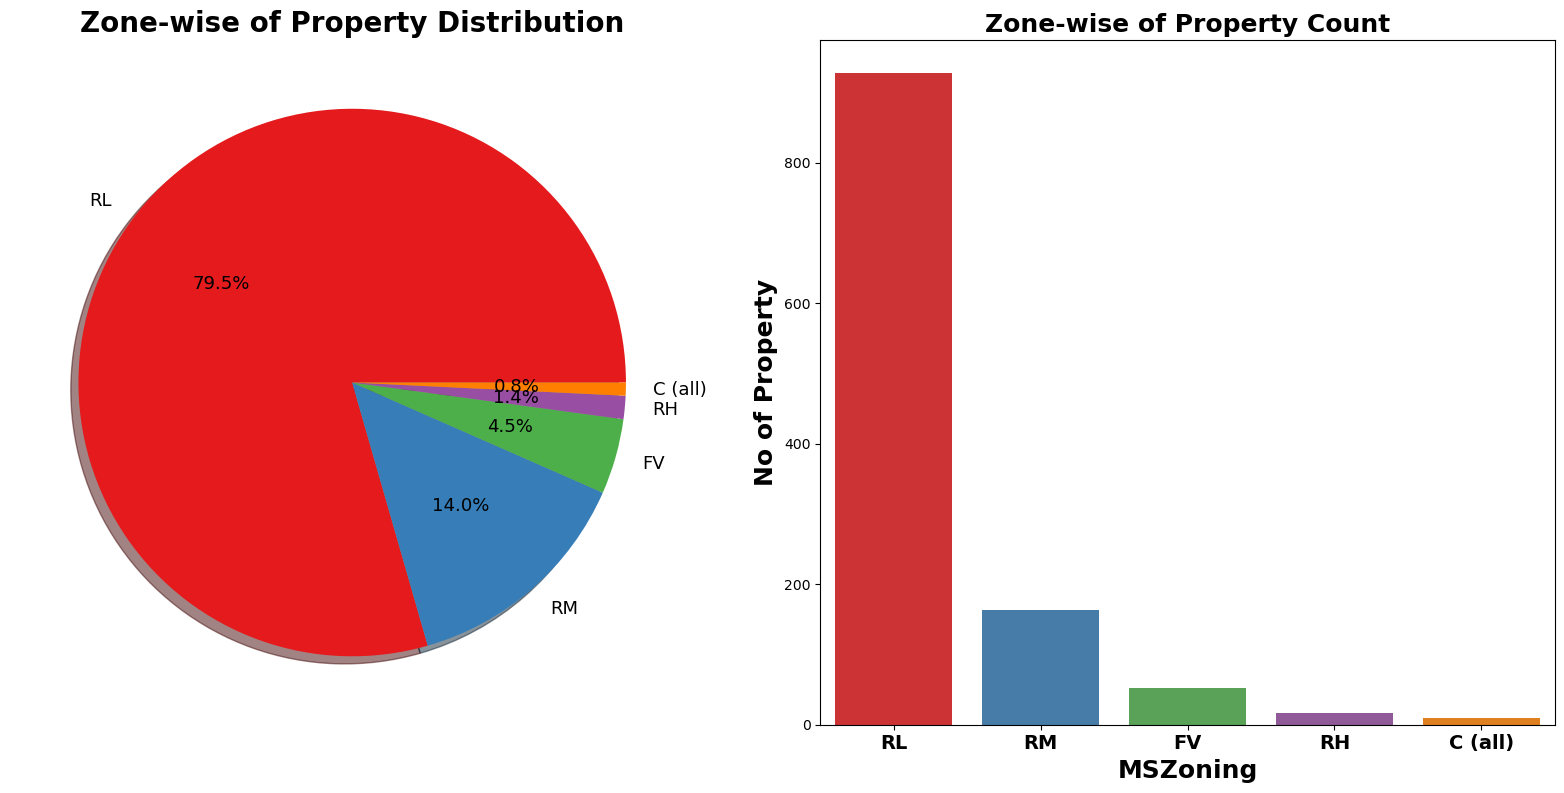

In [66]:
#Data Analysis
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['MSZoning'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Zone-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('MSZoning',data=df,ax=ax[1])
ax[1].set_title('Zone-wise of Property Count',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("MSZoning",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

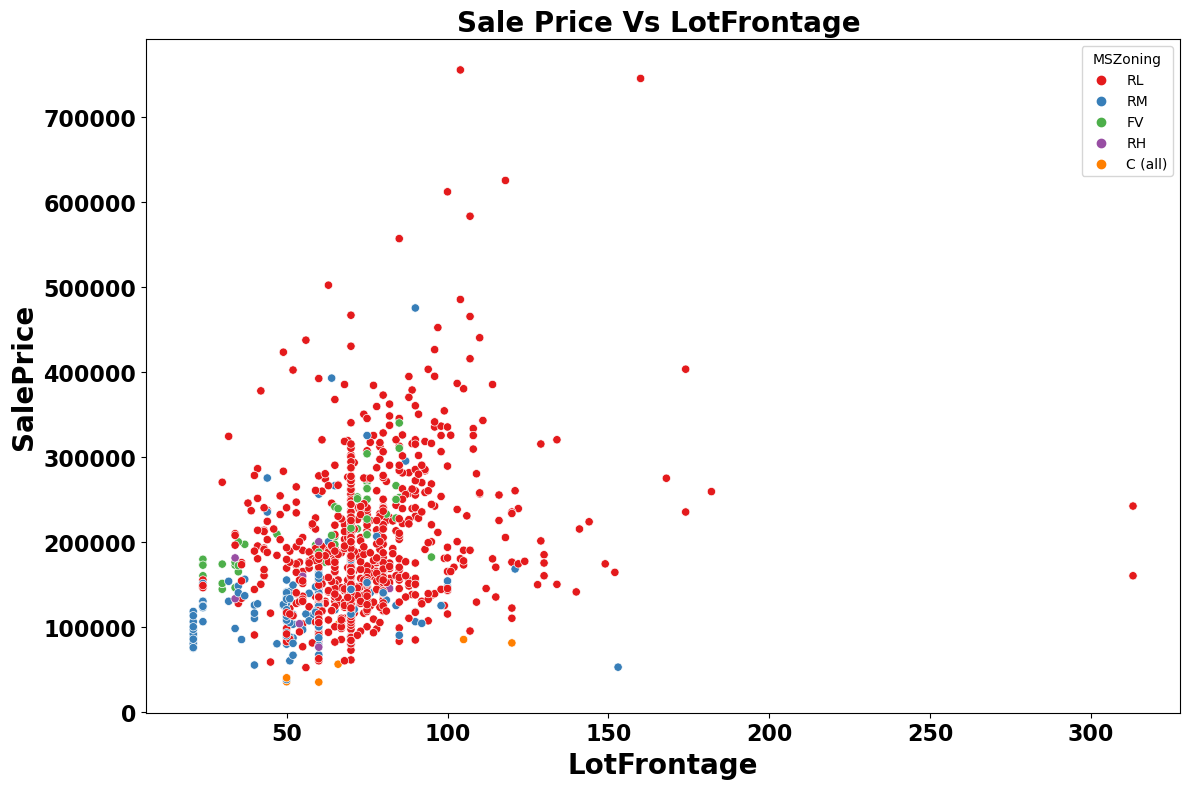

In [67]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotFrontage'], hue =df['MSZoning'])
plt.title("Sale Price Vs LotFrontage ",fontsize=20,fontweight ='bold')
plt.xlabel('LotFrontage',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

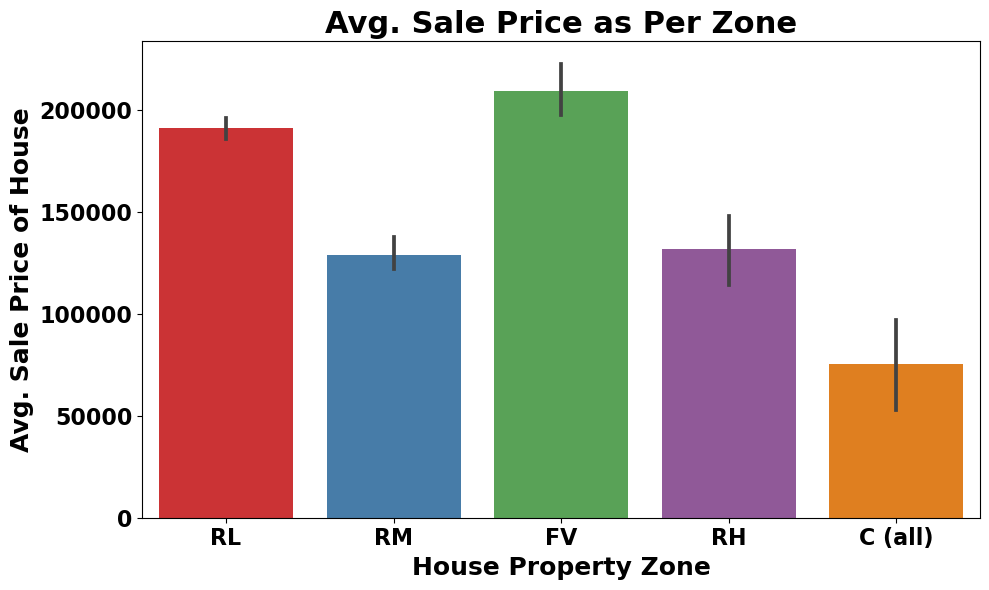

In [68]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette("Set1")
plt.figure(figsize = (10,6))
sns.barplot(y = df['SalePrice'], x= df['MSZoning'])
plt.title('Avg. Sale Price as Per Zone', fontsize=22, fontweight='bold')
plt.xlabel('House Property Zone', fontsize= 18, fontweight='bold')
plt.ylabel('Avg. Sale Price of House', fontsize=18, fontweight= 'bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [69]:
Feature_grp1 = ["BldgType", "HouseStyle", "OverallQual", "OverallCond"]

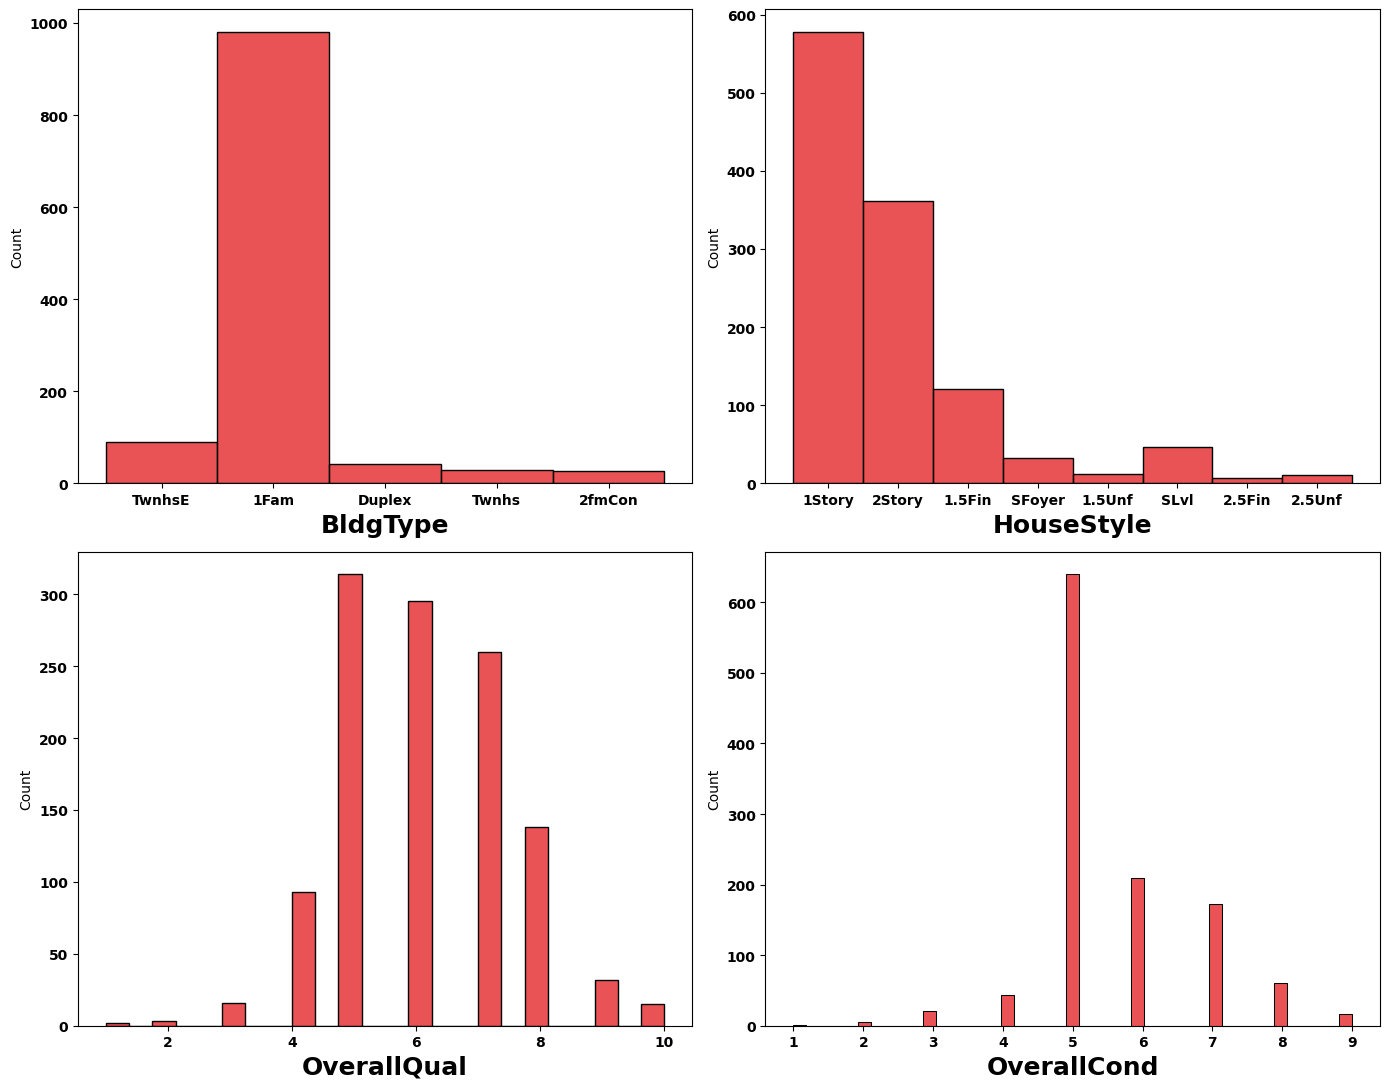

In [70]:
plt.figure(figsize=(14,11),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.histplot( df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

In [71]:
df.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [72]:
Feature_grp2 = ["Year_SinceBuilt", "Year_SinceRemodAdded", 'Year_Since_Sold', "GarageAge"]

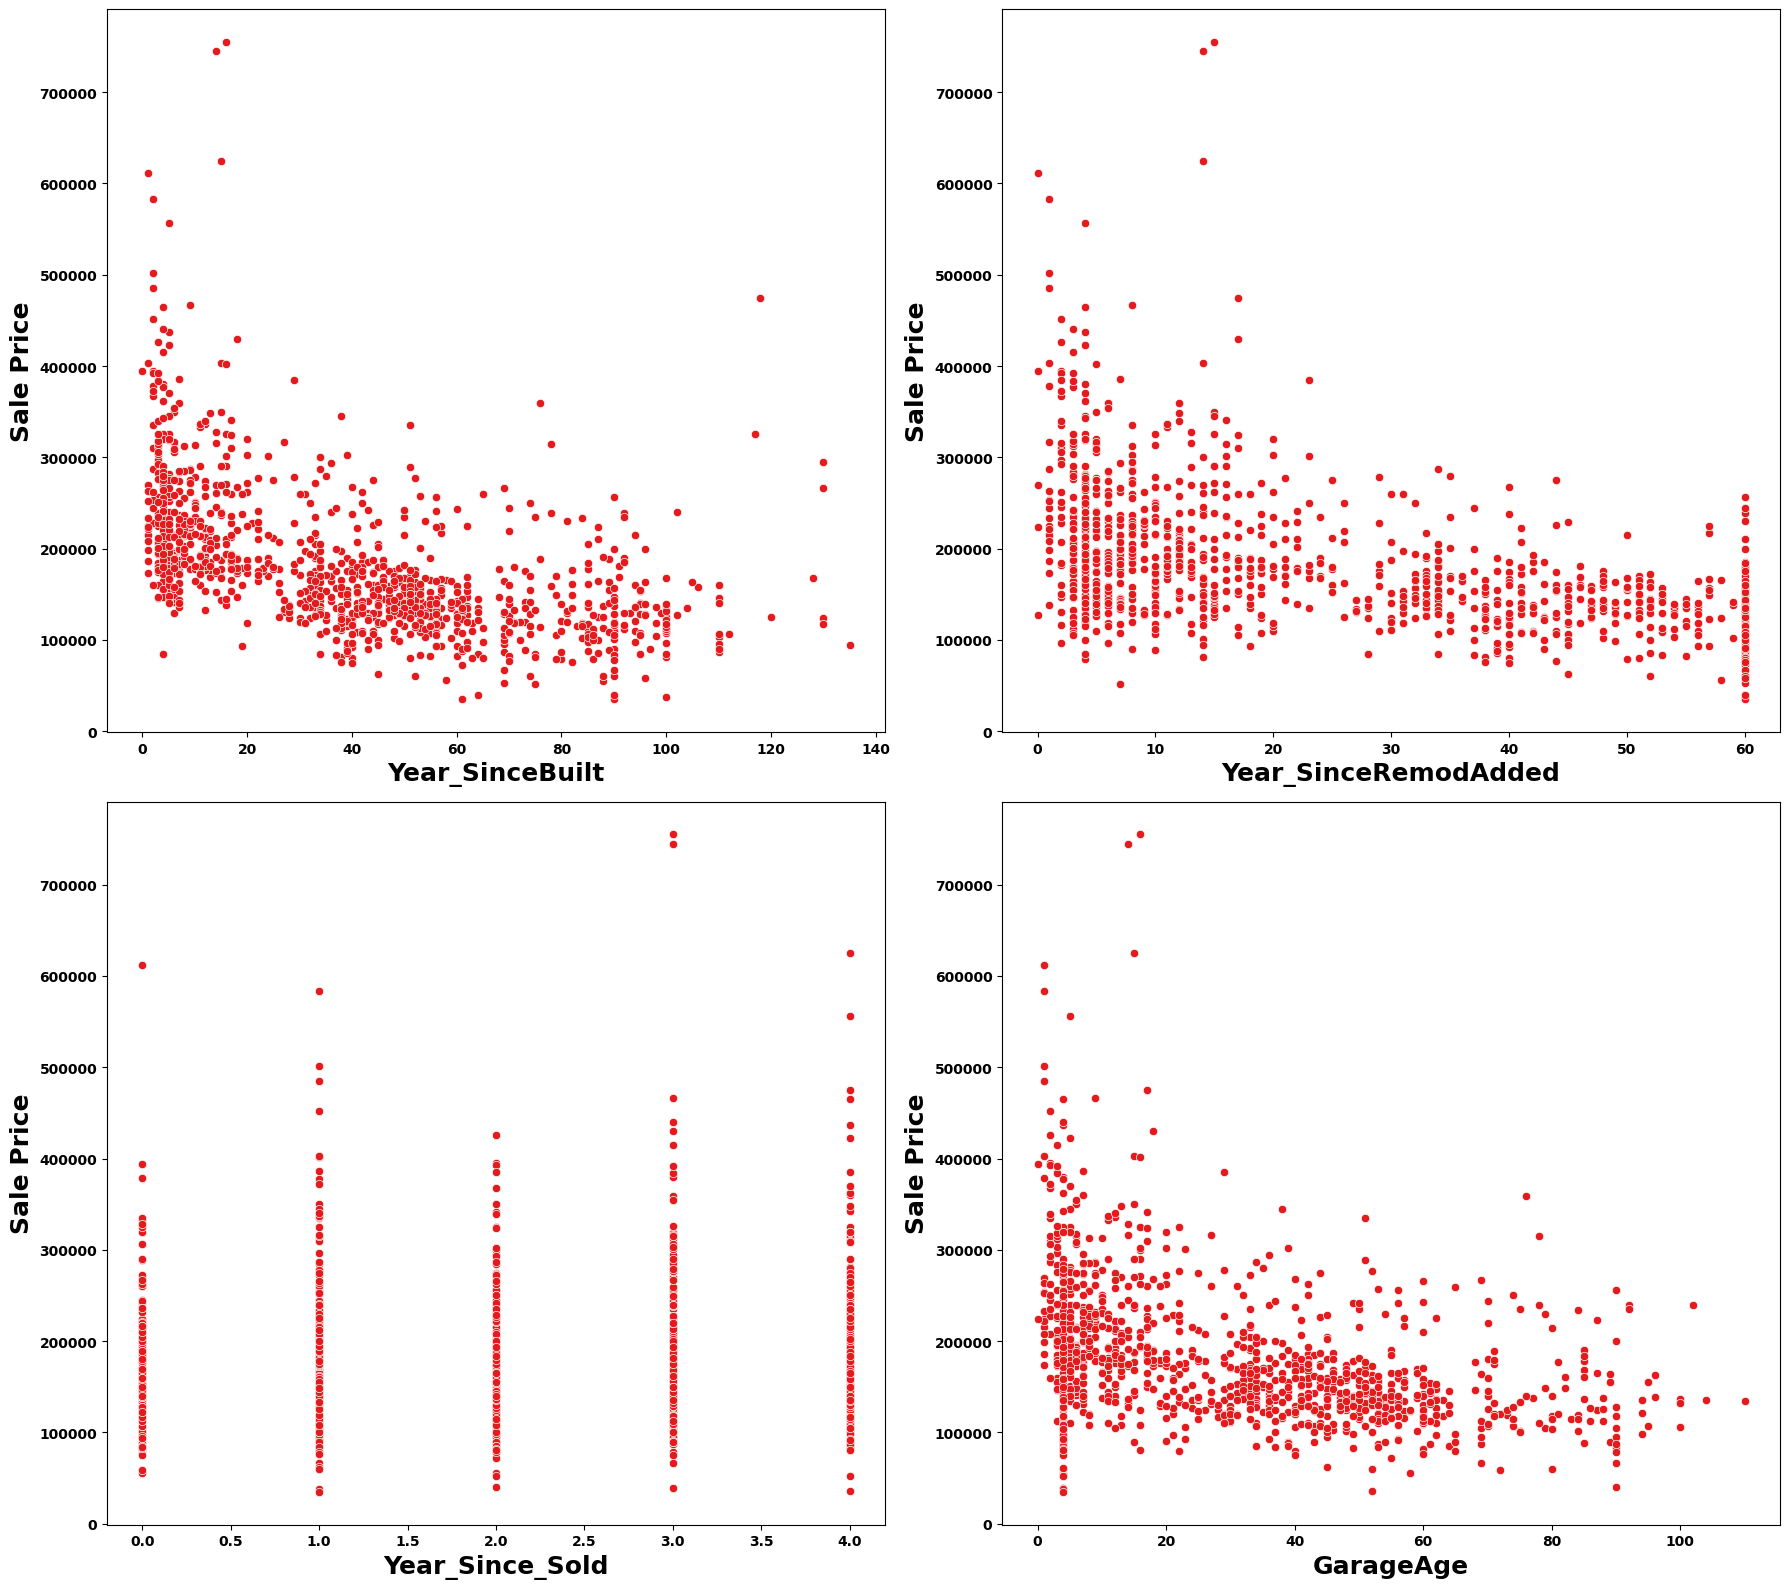

In [73]:
plt.figure(figsize=(18,16),facecolor='white')
plotnumber=1

for i in Feature_grp2:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.scatterplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

In [74]:
Feature_grp3 = ["Exterior1st","Exterior2nd", "MasVnrType", "ExterQual", "ExterCond"]

In [75]:
Feature_grp4= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [76]:
df['ScreenPorch'].value_counts()

0      1073
192       5
224       5
189       4
180       3
120       3
168       3
160       3
126       3
144       2
288       2
176       2
142       2
184       2
147       2
100       2
200       2
90        2
216       2
260       1
287       1
198       1
170       1
440       1
175       1
385       1
161       1
163       1
197       1
145       1
259       1
143       1
252       1
190       1
291       1
40        1
322       1
154       1
156       1
165       1
60        1
63        1
225       1
95        1
265       1
53        1
480       1
128       1
140       1
410       1
204       1
155       1
182       1
116       1
178       1
185       1
153       1
266       1
222       1
271       1
273       1
99        1
122       1
80        1
130       1
Name: ScreenPorch, dtype: int64

In [77]:
df['3SsnPorch'].value_counts()

0      1146
168       3
216       2
180       2
144       2
153       1
23        1
304       1
130       1
182       1
290       1
238       1
245       1
162       1
96        1
140       1
196       1
508       1
Name: 3SsnPorch, dtype: int64

In [78]:
df['MiscVal'].value_counts()

0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64

In [79]:
df['PoolArea'].value_counts()

0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64

In [80]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since_Sold,GarageAge
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,2,WD,Normal,128000,34,34,3,33.0
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,0,10,WD,Normal,268000,40,40,3,40.0
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,6,WD,Normal,269790,14,13,3,13.0
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,1,COD,Normal,190000,33,33,0,33.0
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,6,WD,Normal,215000,33,10,1,33.0


In [81]:
#Outliers detection and removal
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_Since_Sold'], float64: ['LotFrontage', 'MasVnrArea', 'GarageAge'], object: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageTyp

In [82]:
Numerical = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                      'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                      'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                      'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_Since_Sold', 
                      'LotFrontage', 'MasVnrArea', 'GarageAge']

In [83]:
Categorical = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
                        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                        'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 
                        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

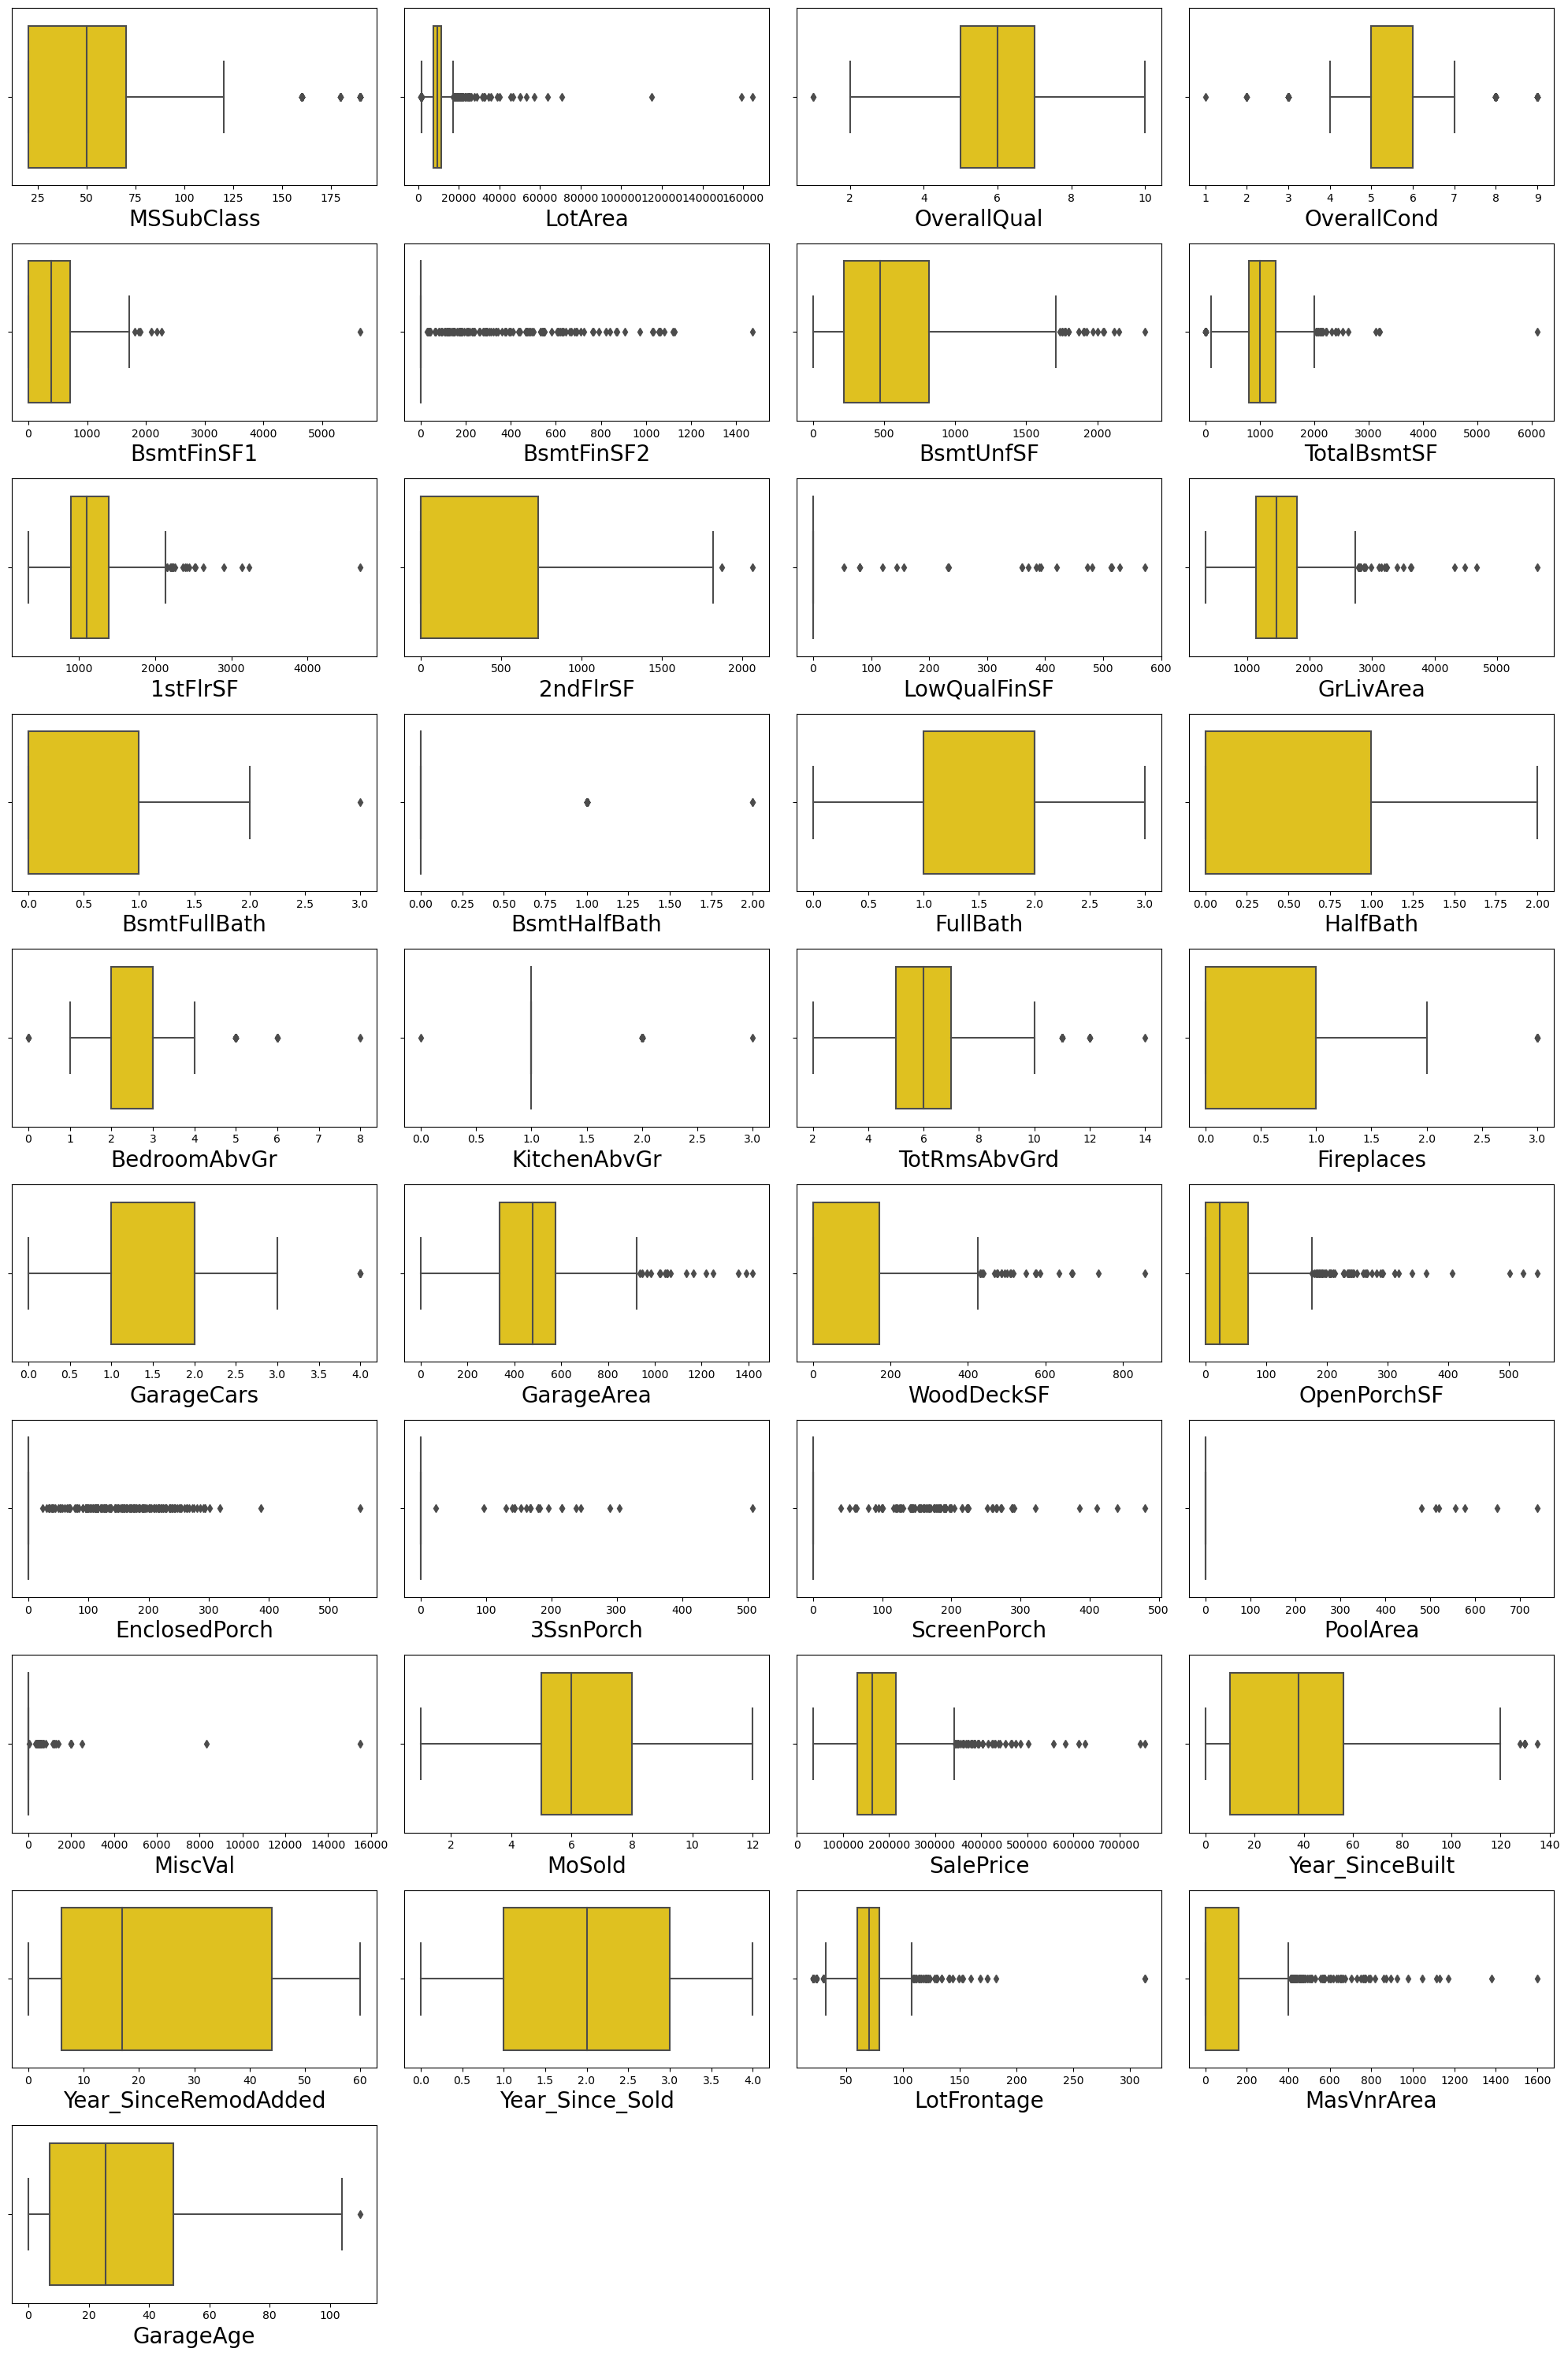

In [84]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in Numerical:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[i],color='gold')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [85]:
df.drop(['Id','Utilities'],axis=1,inplace=True)
dft.drop(['Id','Utilities'],axis=1,inplace=True)

In [86]:
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
dft.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

In [87]:
df.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)
dft.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

In [88]:
df.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)
dft.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

In [89]:
#correlation
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since_Sold,GarageAge
MSSubClass,1.000000,-0.336234,-0.124151,0.070462,-0.056978,0.028215,-0.214042,0.086448,0.004556,0.008207,...,-0.027639,-0.092408,-0.022609,0.017468,-0.016015,-0.060775,-0.023988,-0.056618,0.038595,-0.093390
LotFrontage,-0.336234,1.000000,0.296790,0.229981,-0.047851,0.188273,0.356180,0.374000,0.092807,0.001375,...,0.260224,0.322750,0.087267,0.151044,0.022579,0.323851,-0.112000,-0.089513,0.004162,-0.028295
LotArea,-0.124151,0.296790,1.000000,0.107188,0.017513,0.120192,0.259733,0.281360,0.142387,0.059282,...,0.158313,0.195162,0.216720,0.093080,0.015141,0.249499,-0.005506,-0.027228,0.035399,0.054091
OverallQual,0.070462,0.229981,0.107188,1.000000,-0.083167,0.403985,0.528285,0.599700,0.101732,-0.030702,...,0.596322,0.566782,0.227137,0.341030,0.090638,0.789185,-0.575800,-0.555945,0.048759,-0.427205
OverallCond,-0.056978,-0.047851,0.017513,-0.083167,1.000000,-0.135133,-0.162481,-0.065006,-0.039680,0.091016,...,-0.161996,-0.126021,0.012290,-0.024899,0.005519,-0.065642,0.377731,-0.080669,-0.055517,0.303182
MasVnrArea,0.028215,0.188273,0.120192,0.403985,-0.135133,1.000000,0.362330,0.384386,0.084498,0.014974,...,0.340100,0.363537,0.152083,0.127876,0.012707,0.460535,-0.318562,-0.178583,0.013220,-0.210228
TotalBsmtSF,-0.214042,0.356180,0.259733,0.528285,-0.162481,0.362330,1.000000,0.461067,0.296654,0.009657,...,0.423592,0.492980,0.234848,0.249284,0.032920,0.595042,-0.386265,-0.280720,0.030448,-0.251091
GrLivArea,0.086448,0.374000,0.281360,0.599700,-0.065006,0.384386,0.461067,1.000000,0.036206,-0.013145,...,0.455707,0.459261,0.242525,0.368318,0.065385,0.707300,-0.198644,-0.295048,0.056401,-0.155869
BsmtFullBath,0.004556,0.092807,0.142387,0.101732,-0.039680,0.084498,0.296654,0.036206,1.000000,-0.150317,...,0.105895,0.166060,0.161772,0.060848,-0.012877,0.212924,-0.164983,-0.104643,-0.060557,-0.085670
BsmtHalfBath,0.008207,0.001375,0.059282,-0.030702,0.091016,0.014974,0.009657,-0.013145,-0.150317,1.000000,...,-0.021730,-0.020305,0.051038,-0.050523,0.039928,-0.011109,0.028161,0.011375,0.052576,0.059867


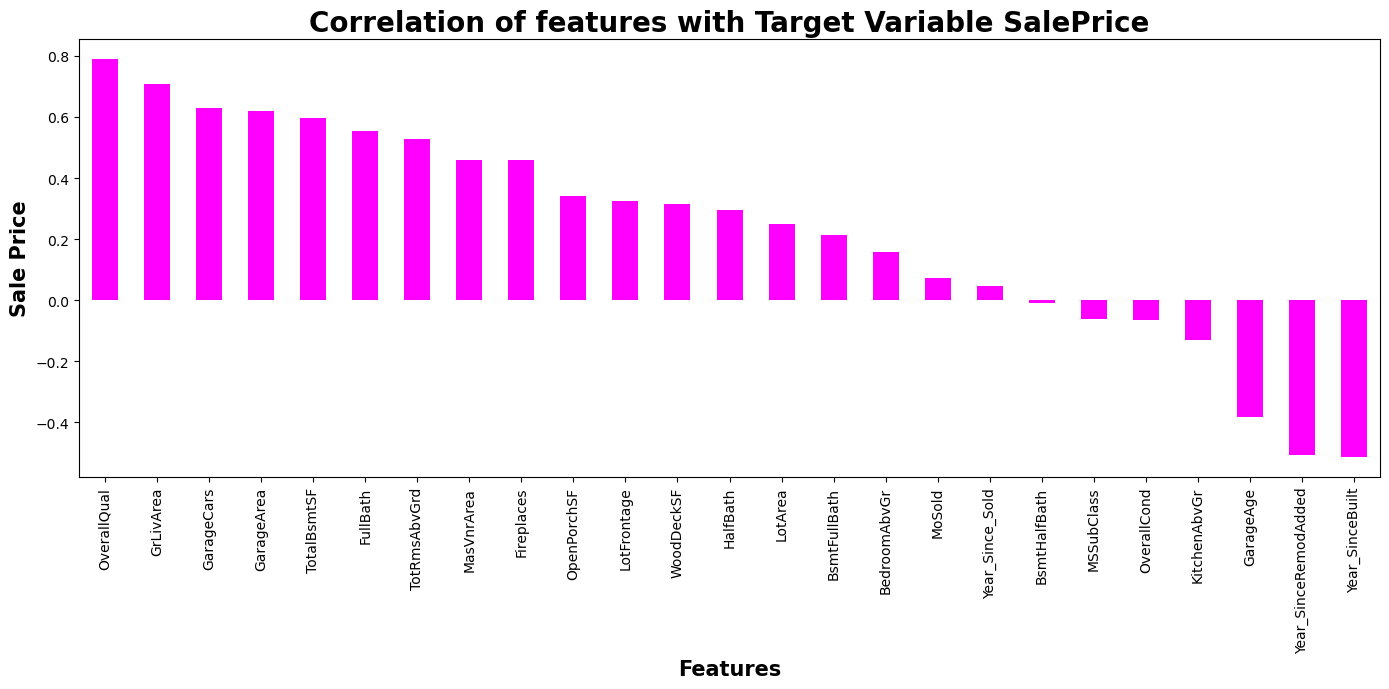

In [90]:
plt.figure(figsize = (14,7))
df.corr()['SalePrice'].drop(['SalePrice']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Sale Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable SalePrice',fontsize = 20,fontweight='bold')
plt.tight_layout()
plt.show()

In [92]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since_Sold,GarageAge
0,120,3,70.0,4928,1,0,3,4,0,13,...,0,205,2,8,4,128000,34,34,3,33.0
1,20,3,95.0,15865,1,0,3,4,1,12,...,81,207,10,8,4,268000,40,40,3,40.0
2,60,3,92.0,9920,1,0,3,1,0,15,...,180,130,6,8,4,269790,14,13,3,13.0
3,20,3,105.0,11751,1,0,3,4,0,14,...,0,122,1,0,4,190000,33,33,0,33.0
4,20,3,70.0,16635,1,0,3,2,0,14,...,240,0,6,8,4,215000,33,10,1,33.0


In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    dft[i] = le.fit_transform(dft[i])
dft.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since,GarageAge
0,20,2,86.0,14157,1,0,1,0,0,21,...,2,178,51,7,5,2,4,4,3,5.0
1,120,2,65.0,5814,1,0,3,1,0,21,...,2,63,0,8,0,0,25,26,1,26.0
2,20,2,65.0,11838,1,3,3,4,0,4,...,2,202,151,6,5,2,8,9,1,9.0
3,70,2,75.0,12000,1,3,0,4,0,5,...,2,0,0,7,5,2,68,60,1,69.0
4,60,2,86.0,14598,1,0,3,1,0,20,...,2,100,18,1,5,2,2,3,2,3.0


In [95]:
#scaling
X = df.drop(['SalePrice'], axis =1)
Y = df['SalePrice']

In [96]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_test = scaler.fit_transform(dft)

In [99]:
#Model building

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor


In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (817, 62)
Training Target Vector Size : (817,)
Test Feature Matrix Size: (351, 62)
Test Target Vector Size: (351,)


In [101]:
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8751862980338239 on Random_state 135


In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 20097.055793096148
Mean squared error : 868718000.5387535
Root Mean squared error : 29474.022469604544
 R2 Score :
87.51862980338238


In [103]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7662072724233104
Difference in R2 & CV Score: 10.897902561051339


In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 17786.37829015544
Mean squared error : 661611892.1725315
Root Mean squared error : 25721.8174352539
R2 Score of Random Forest Regressor :
90.49424215042309


In [105]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.8299061642305515
Difference in R2 & CV Score: 7.5036257273679325


In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 32637.380829015543
Mean squared error : 3126837240.1943007
Root Mean squared error : 55918.12979878977
R2 Score of Decision Tree Regressor :
55.07493442609493


In [107]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6378543211907728
Difference in R2 & CV Score: -8.71049769298235


In [108]:
#hyper tuning
from sklearn.model_selection import GridSearchCV

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=135, test_size=0.33)

In [110]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [111]:
parameter = {
 'bootstrap': [True, False],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4 ],
 'n_estimators': [100, 500,1000,1500,2000]}

In [112]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =10)

In [114]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.806 total time=   0.5s
[CV 2/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 2/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.861 total time=   0.4s
[CV 3/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.093 total time=   0.7s
[CV 4/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.800 total time=   0.8s
[CV 5/5; 1/30] START bootstrap=True, max_features=auto, min_samples_le

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 500, 1000, 1500, 2000]},
             verbose=10)

In [115]:
GCV.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 1500}

In [116]:
#Final Model
Final_mod=RandomForestRegressor(max_depth = None, bootstrap = True, max_features='sqrt', min_samples_leaf = 1,
                                n_estimators = 100 )
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 88.66478238427527
mean_squared_error: 788944437.0036043
mean_absolute_error: 18292.84937823834
RMSE value: 28088.15474543681


In [117]:
import joblib
joblib.dump(Final_mod,"Surprise_Housing_Price_Prediction.pkl")

['Surprise_Housing_Price_Prediction.pkl']